# homework 3

Please write a function that returns N samples from a Normal distribution with a given mean and standard deviation.  The only function that you are allowed to use is numpy.random.rand() which returns a random sample from a uniform distribution over [0,1). There are again many ways to doing this.  Please implement the code yourself.  Don't copy from the interne


In [5]:
%matplotlib inline
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction
As we know, the PDF of a 1-D normal distribution is

$$f(x)=\frac{1}{{\sigma \sqrt {2\pi } }}e^{-\frac{(x-\mu)^2}{2{\sigma}^2}}$$

Therefore, the CDF of this normal distribution should be

$$F(x)=\frac{1}{{\sigma \sqrt {2\pi } }}\int_{-\infty}^{x}e^{-\frac{(\xi-\mu)^2}{2{\sigma}^2}}d\xi $$

Here, we use 2-D normal distribution whose mean = 0 and standard deviate = 1 to study the CDF.

$$ F(x,y)=\frac{1}{{2\pi}} \iint_{-\infty}^{(x,y)} e^{-\frac{\xi^2+\eta^2}{2}}d\xi d\eta $$

Transform the equation above into the polar coordinates system, we have

$$ F(r)=\frac{1}{{2\pi}} \int_0^{2\pi} \int_0^r \rho e^{-\frac{\rho^2}{2}}d\rho d\theta = 1-e^{-\frac{r^2}{2}}$$

Thus, the inverse function of F(r) is

$$ R = F^{-1}(z) = \sqrt{-2 ln(1-z)}$$

Where z ~ U(0,1).

Since $X = R cos(\theta)$, and $Y = R sin(\theta)$, we let $U_1 = 1-z$, and $U_2 = \theta/2\pi$, and we get

$$X = \sqrt{-2 ln(U_1)}cos(2\pi U_2), Y = \sqrt{-2 ln(U_1)}sin(2\pi U_2)$$

Where X and Y both satisfy the 1-D standard normal distribution.

So, $X\sigma+\mu$ and $Y\sigma+\mu$ satisfy the 1-D normal distribution whose mean = $\mu$, and SD = $\sigma$.

In [6]:
def normal_sample(mean, stddev, N):
    # put your code here.  You can only use rand() for creating random numbers
    #mean,stddev = np.double(mean),np.double(stddev)
    U1 = np.random.rand(1,N)
    U2 = np.random.rand(1,N)
    X = np.sqrt(-2*np.log(U1))*np.cos(2*np.pi*U2)
    Y = np.sqrt(-2*np.log(U2))*np.sin(2*np.pi*U1)
    X = np.array(stddev*X+mean)
    Y = np.array(stddev*Y+mean)
    Norm = np.hstack((X,Y))
    Hist = plt.hist([Norm[:]],bins=50)
    
    # --------------------verification-------------------------
    x0 = np.linspace(mean-4*stddev,mean+4*stddev,200)
    Gauss = 1.0/stddev/np.sqrt(2*np.pi)*np.exp(-(x0-mean)**2 / (2*stddev**2))
    plt.plot(x0,Gauss/max(Gauss)*max(Hist[0]),color = 'red',label='Verification')
    plt.legend(fontsize=10)
    plt.show()
    return Hist[0]

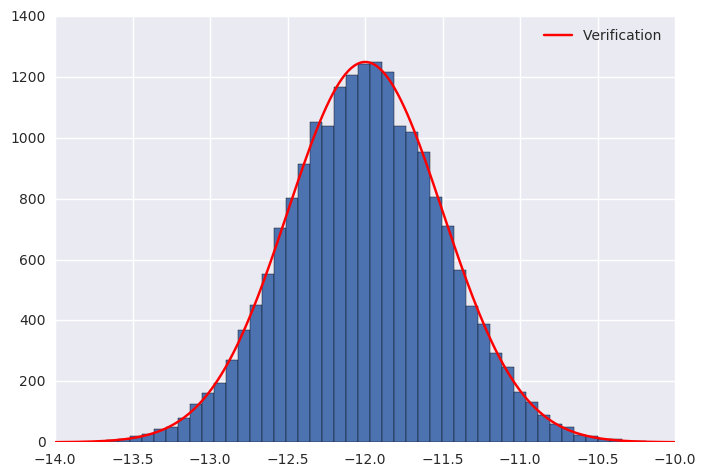

In [7]:
h = normal_sample(-12,0.5,10000)